<a href="https://colab.research.google.com/github/RickFaint/varioususefulbatchfiles/blob/main/levenstein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import ipywidgets as widgets
from IPython.display import display

## run this cell by pressing the play button and then select the file from your drive
## file should have two columns the address and the postcode

## this code just creates some boxes to put values in

auto_create_as_new_location1 = widgets.IntText(
    value=40,
    description='new_location:',
    disabled=False
)

matchaddress = widgets.Text(
    disabled=False,
    default = "AMAZON - BOLTON (MAN3) 360 Logistics North"
)

put_in_inbox1 = widgets.IntText(
    value=20,
    description='inbox',
    disabled=False
)
text_description = widgets.HTML(value=" Select a CSV file to upload.")
text_description2 = widgets.HTML(value=" Value must be larger than the inbox value")
text_description3 = widgets.HTML(value=" Value must be smaller than the new location value")
text_description4 = widgets.HTML(value=" enter match location")
upload = widgets.FileUpload(

    accept='.csv',  # Specify the accepted file type (optional)
    multiple=False   # Set to True if you want to allow multiple files to be uploaded
)
display(matchaddress, text_description4)
display(upload, text_description)
display(auto_create_as_new_location1, text_description2)
display(put_in_inbox1, text_description3)

Text(value='')

HTML(value=' enter match location')

FileUpload(value={}, accept='.csv', description='Upload')

HTML(value=' Select a CSV file to upload.')

IntText(value=40, description='new_location:')

HTML(value=' Value must be larger than the inbox value')

IntText(value=20, description='inbox')

HTML(value=' Value must be smaller than the new location value')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 it is TEXT(VALUE='AMAZON - BOLTON (MAN3) 360 LOGISTICS NORTH')
TEXTVALUEAMAZONBOLTONMAN3360LOGISTICSNORTH
automatch      36
inbox           8
newlocation     1
Name: category, dtype: int64


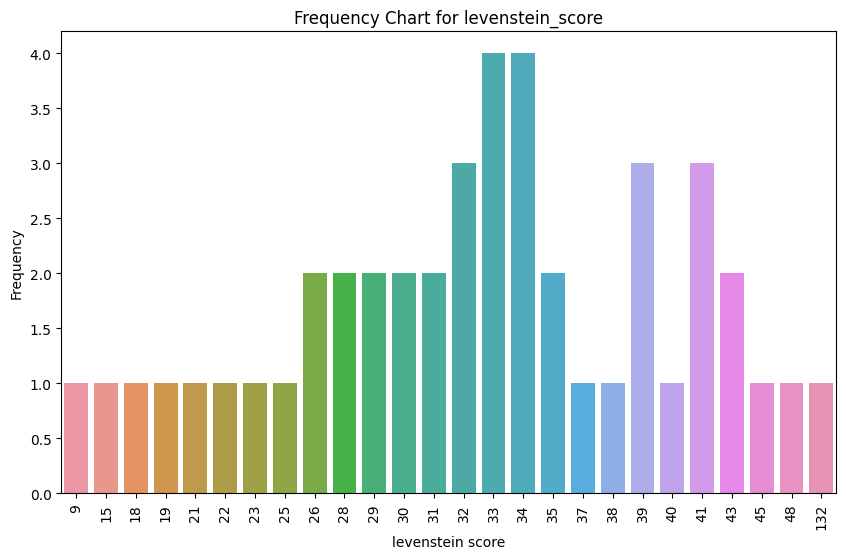

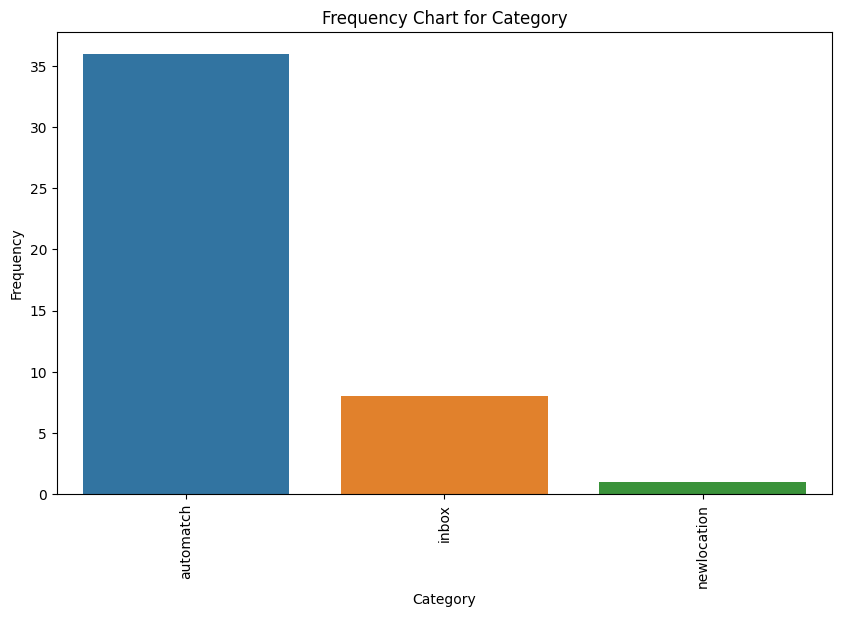

complete


In [39]:
# the installs below need to be done once per session uncomment the first time you log in
# run the cell. It will do the imports . Then comment out . If you do not comment out
# it wil still work but it will take x2 as long

!pip install pandas
!pip install python-Levenshtein
!pip install seaborn
!pip install matplotlib
import io
from google.colab import drive
import pandas as pd #import panda library
import Levenshtein as pl #import levenstein library
import re #import regex library
import seaborn as sns #import seaborn
import matplotlib.pyplot as plt #import matplotlib

def categorise_score(row):
  #function used to categorise scores
    if row['levenstein_score'] < put_in_inbox_value:
        return "automatch"
    elif put_in_inbox_value <= row['levenstein_score'] < auto_create_as_new_location_value:
        return "inbox"
    else:
        return "newlocation"

drive.mount('/content/drive') # this mounts your google drive however you can just upload from your C drive or other network location

# Convert IntText widget values to integers
put_in_inbox_value = int(put_in_inbox1.value)
auto_create_as_new_location_value = int(auto_create_as_new_location1.value)


matchaddress = str(matchaddress).upper() # example "AMAZON - BOLTON (MAN3) 360 Logistics North" # comparison address.
print(" it is " + matchaddress)

cleanMatch = re.sub(r'\W+', '', matchaddress)  # removes all white space and any non alpha numberic charactors

print(cleanMatch) # prints the clean match address out this is for checking puporses

uploaded_file = list(upload.value.values())[0]



# Get the file content as bytes
file_content = uploaded_file['content']

addressdf = pd.read_csv(io.BytesIO(file_content)) # upload file as a raw string. files are uploaded into a panda.
# You will need to upload your file via the file menu on colab. Files are deleted at end of the session
# File is the address in a single cell and then the postcode. Postcode is not used . Included in case I want to use it later

addressdf.columns = ['address', 'postcode'] #rename columns so that it won't error if columns named differently

addressdf['cleaned_address'] = addressdf['address'].str.replace(r'\W+', '', regex=True) #adds a new column. New column is address with white space/non alpha

addressdf['cleaned_address'] = addressdf['cleaned_address'].str.upper() # converts to upper

addressdf['levenstein_score'] = addressdf['cleaned_address'].apply(lambda x: pl.distance(x, cleanMatch)) #calculates the lev distance

#gives a classification of the lev distance by calling categorise score function
addressdf['category'] = addressdf.apply(categorise_score, axis=1)


#gets a count of those classifcation then prints them
cat_counts = addressdf['category'].str.split().explode().value_counts()
print(cat_counts)

#calculates the frequency of each levenstien score
column_freq = addressdf['levenstein_score'].value_counts()

# Plot the frequency chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=column_freq.index, y=column_freq.values)
plt.xlabel('levenstein score')
plt.ylabel('Frequency')
plt.title('Frequency Chart for levenstein_score')
plt.xticks(rotation=90)
plt.show()

column_freq_cat = addressdf['category'].value_counts()

# Plot the frequency chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=column_freq_cat.index, y=column_freq_cat.values)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency Chart for Category')
plt.xticks(rotation=90)
plt.show()

addressdf.to_csv(r"/content/addressresults.csv", index=False) #exports the results so you can look at them

print("complete") # so you can tell its finished. You need to f5 to see file

### Classification analysis - to use this section take your results from first section and export to excel. Add a new column to the end where you classify each address. Save and reimport your results. It will give you a statistical score of how good the predictions are and also a confusion matrix. What we are concerned about is auto-matching when it should be a new address. These stats will allow you to tweak the parameters

In [17]:
!pip install scikit-learn

text_description5 = widgets.HTML(value=" import your results sheet including you classifations")
upload2 = widgets.FileUpload(

    accept='.csv',  # Specify the accepted file type (optional)
    multiple=False   # Set to True if you want to allow multiple files to be uploaded
)

display(upload2, text_description5)



FileUpload(value={}, accept='.csv', description='Upload')

HTML(value=' import your results sheet including you classifations')

Cohen's Kappa: -0.03478773584905648
A negative value of Cohen's Kappa suggests that there is less agreement between the two raters than would be expected by chance. This indicates substantial disagreement or systematic disagreement between the two sets of ratings.


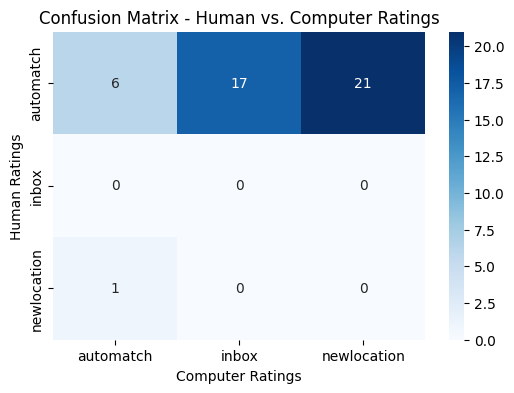

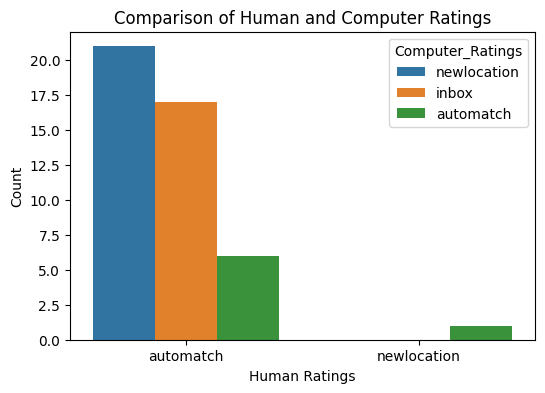

In [30]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

uploaded_file2 = list(upload2.value.values())[0]



# Get the file content as bytes
file_content2 = uploaded_file2['content']

classdf = pd.read_csv(io.BytesIO(file_content2)) # upload file as a raw string. files are uploaded into a panda.

classdf = classdf.rename(columns={classdf.columns[5]: "human"}) # rename column

human_ratings = classdf['human'] #get human judgements
computer_ratings = classdf['category'] #get computer judgements

# Calculate Cohen's Kappa
kappa_score = cohen_kappa_score(human_ratings, computer_ratings)

# Output the result
print("Cohen's Kappa:", kappa_score)

if kappa_score < 0:
        feedback = "A negative value of Cohen's Kappa suggests that there is less agreement between the two raters than would be expected by chance. This indicates substantial disagreement or systematic disagreement between the two sets of ratings."
elif kappa_score == 0:
        feedback = "A kappa value of 0 indicates that the observed agreement is the same as expected by chance. There is no agreement between the raters beyond what would be expected due to random chance."
elif kappa_score < 0.2:
        feedback = "This range of Cohen's Kappa is considered slight agreement. The agreement between the raters is minimal and might not be reliable."
elif kappa_score < 0.4:
        feedback = "A kappa value in this range indicates fair agreement. The level of agreement is better than chance but still relatively modest."
elif kappa_score < 0.6:
        feedback = "A kappa value in this range suggests moderate agreement. The level of agreement is considered acceptable for many applications."
elif kappa_score < 0.8:
        feedback = "A kappa value in this range indicates substantial agreement. The agreement between the two raters is relatively strong."
else:
        feedback = "A kappa value of 0.8 or higher represents almost perfect agreement. It means that the two raters' judgments closely align, and the results are highly reliable."

print(feedback)



# Get the common unique values from both human_ratings and computer_ratings
unique_values = sorted(set(human_ratings.unique()) | set(computer_ratings.unique()))

# Calculate the confusion matrix
cm = confusion_matrix(human_ratings, computer_ratings, labels=unique_values)

confusion_matrix_df = pd.DataFrame(cm, index=unique_values, columns=unique_values)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Human vs. Computer Ratings")
plt.xlabel("Computer Ratings")
plt.ylabel("Human Ratings")
plt.show()

# Combine human and computer ratings into a DataFrame for easy comparison
ratings_comparison = pd.DataFrame({'Human_Ratings': human_ratings, 'Computer_Ratings': computer_ratings})

# Create a count plot to visualize the frequency of agreements and disagreements
# the colours represent how the computer matched our interpretations
plt.figure(figsize=(6, 4))
sns.countplot(x='Human_Ratings', hue='Computer_Ratings', data=ratings_comparison)
plt.title('Comparison of Human and Computer Ratings')
plt.xlabel('Human Ratings')
plt.ylabel('Count')
plt.show()







